<a href="https://colab.research.google.com/github/taciturn02/CreditCardFruadDetection/blob/main/creditCardFraudDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [107]:
from google.colab import drive

In [108]:
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [109]:
import pandas as pd
from datetime import datetime
import seaborn as sns
import matplotlib.pyplot as plt

Read the Data

In [110]:
train_df = pd.read_csv("/content/drive/MyDrive/CreditCard_DataSet/fraudTest.csv")

*Viewing* the data

In [111]:
train_df.head(5)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,33.9659,-80.9355,333497,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,40.3207,-110.4360,302,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,40.6729,-73.5365,34496,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,28.5697,-80.8191,54767,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,44.2529,-85.0170,1126,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0


analysing the data i.e. Checking the datatypes of varios features

In [112]:
train_df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 23 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   Unnamed: 0             555719 non-null  int64  
 1   trans_date_trans_time  555719 non-null  object 
 2   cc_num                 555719 non-null  int64  
 3   merchant               555719 non-null  object 
 4   category               555719 non-null  object 
 5   amt                    555719 non-null  float64
 6   first                  555719 non-null  object 
 7   last                   555719 non-null  object 
 8   gender                 555719 non-null  object 
 9   street                 555719 non-null  object 
 10  city                   555719 non-null  object 
 11  state                  555719 non-null  object 
 12  zip                    555719 non-null  int64  
 13  lat                    555719 non-null  float64
 14  long                   555719 non-nu

In [113]:
train_df.describe( include = "all")


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,lat,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud
count,555719.000000,555719,5.557190e+05,555719,555719,555719.000000,555719,555719,555719,555719,...,555719.000000,555719.000000,5.557190e+05,555719,555719,555719,5.557190e+05,555719.000000,555719.000000,555719.000000
unique,NaN,544760,NaN,693,14,NaN,341,471,2,924,...,NaN,NaN,NaN,478,910,555719,NaN,NaN,NaN,NaN
top,NaN,2020-12-19 16:02:22,NaN,fraud_Kilback LLC,gas_transport,NaN,Christopher,Smith,F,444 Robert Mews,...,NaN,NaN,NaN,Film/video editor,1977-03-23,2da90c7d74bd46a0caf3777415b3ebd3,NaN,NaN,NaN,NaN
freq,NaN,4,NaN,1859,56370,NaN,11443,12146,304886,1474,...,NaN,NaN,NaN,4119,2408,1,NaN,NaN,NaN,NaN
mean,277859.000000,NaN,4.178387e+17,NaN,NaN,69.392810,NaN,NaN,NaN,NaN,...,38.543253,-90.231325,8.822189e+04,NaN,NaN,NaN,1.380679e+09,38.542798,-90.231380,0.003860
std,160422.401459,NaN,1.309837e+18,NaN,NaN,156.745941,NaN,NaN,NaN,NaN,...,5.061336,13.721780,3.003909e+05,NaN,NaN,NaN,5.201104e+06,5.095829,13.733071,0.062008
min,0.000000,NaN,6.041621e+10,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,...,20.027100,-165.672300,2.300000e+01,NaN,NaN,NaN,1.371817e+09,19.027422,-166.671575,0.000000
25%,138929.500000,NaN,1.800429e+14,NaN,NaN,9.630000,NaN,NaN,NaN,NaN,...,34.668900,-96.798000,7.410000e+02,NaN,NaN,NaN,1.376029e+09,34.755302,-96.905129,0.000000
50%,277859.000000,NaN,3.521417e+15,NaN,NaN,47.290000,NaN,NaN,NaN,NaN,...,39.371600,-87.476900,2.408000e+03,NaN,NaN,NaN,1.380762e+09,39.376593,-87.445204,0.000000
75%,416788.500000,NaN,4.635331e+15,NaN,NaN,83.010000,NaN,NaN,NaN,NaN,...,41.894800,-80.175200,1.968500e+04,NaN,NaN,NaN,1.385867e+09,41.954163,-80.264637,0.000000


Checking for missing values

In [114]:
train_df.isna().sum()


Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

Checking for NULL values

In [115]:
train_df.isnull().sum()

Unnamed: 0               0
trans_date_trans_time    0
cc_num                   0
merchant                 0
category                 0
amt                      0
first                    0
last                     0
gender                   0
street                   0
city                     0
state                    0
zip                      0
lat                      0
long                     0
city_pop                 0
job                      0
dob                      0
trans_num                0
unix_time                0
merch_lat                0
merch_long               0
is_fraud                 0
dtype: int64

Checking for any Duplicates.

In [116]:
train_df.duplicated().sum()

0

Converting Trans_date_trans_time to Day,Month,Hour

In [117]:
train_df['trans_date_trans_time'] = pd.to_datetime(train_df['trans_date_trans_time'],format='mixed')

In [118]:
train_df['hour'] = train_df['trans_date_trans_time'].dt.hour
train_df['day'] = train_df['trans_date_trans_time'].dt.day_name()
train_df['month'] = train_df['trans_date_trans_time'].dt.month
train_df.head()

,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,day,month
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,Mechanical engineer,1968-03-19,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,12,Sunday,6
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,"Sales professional, IT",1990-01-17,324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,12,Sunday,6
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,"Librarian, public",1970-10-21,c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,12,Sunday,6
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,Set designer,1987-07-25,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,12,Sunday,6
4,4,2020-06-21 12:15:17,3526826139003047,fraud_Johnston-Casper,travel,3.19,Nathan,Massey,M,5783 Evan Roads Apt. 465,...,Furniture designer,1955-07-06,57ff021bd3f328f8738bb535c302a31b,1371816917,44.959148,-85.884734,0,12,Sunday,6


Finding current age of the customer



In [119]:
train_df['dob'] = pd.to_datetime(train_df['dob'],format='mixed')
train_df['age_cust'] = (train_df['trans_date_trans_time'].dt.year - train_df['dob'].dt.year).astype(int)
train_df.drop(columns='dob',inplace=True)


In [120]:
train_df.head(4)


,Unnamed: 0,trans_date_trans_time,cc_num,merchant,category,amt,first,last,gender,street,...,job,trans_num,unix_time,merch_lat,merch_long,is_fraud,hour,day,month,age_cust
0,0,2020-06-21 12:14:25,2291163933867244,fraud_Kirlin and Sons,personal_care,2.86,Jeff,Elliott,M,351 Darlene Green,...,Mechanical engineer,2da90c7d74bd46a0caf3777415b3ebd3,1371816865,33.986391,-81.200714,0,12,Sunday,6,52
1,1,2020-06-21 12:14:33,3573030041201292,fraud_Sporer-Keebler,personal_care,29.84,Joanne,Williams,F,3638 Marsh Union,...,"Sales professional, IT",324cc204407e99f51b0d6ca0055005e7,1371816873,39.450498,-109.960431,0,12,Sunday,6,30
2,2,2020-06-21 12:14:53,3598215285024754,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,Ashley,Lopez,F,9333 Valentine Point,...,"Librarian, public",c81755dbbbea9d5c77f094348a7579be,1371816893,40.495810,-74.196111,0,12,Sunday,6,50
3,3,2020-06-21 12:15:15,3591919803438423,fraud_Haley Group,misc_pos,60.05,Brian,Williams,M,32941 Krystal Mill Apt. 552,...,Set designer,2159175b9efe66dc301f149d3d5abf8c,1371816915,28.812398,-80.883061,0,12,Sunday,6,33


In [121]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 26 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   Unnamed: 0             555719 non-null  int64         
 1   trans_date_trans_time  555719 non-null  datetime64[ns]
 2   cc_num                 555719 non-null  int64         
 3   merchant               555719 non-null  object        
 4   category               555719 non-null  object        
 5   amt                    555719 non-null  float64       
 6   first                  555719 non-null  object        
 7   last                   555719 non-null  object        
 8   gender                 555719 non-null  object        
 9   street                 555719 non-null  object        
 10  city                   555719 non-null  object        
 11  state                  555719 non-null  object        
 12  zip                    555719 non-null  int6

Removing Unnecessary Features

In [122]:
dropColumn =["Unnamed: 0","job" ,"cc_num","trans_num","zip" ,"unix_time","first","last","street","city","trans_date_trans_time","state"]
train_df.drop(dropColumn,axis = 1,inplace = True)


In [123]:
train_df.head(5)

,merchant,category,amt,gender,lat,long,city_pop,merch_lat,merch_long,is_fraud,hour,day,month,age_cust
0,fraud_Kirlin and Sons,personal_care,2.86,M,33.9659,-80.9355,333497,33.986391,-81.200714,0,12,Sunday,6,52
1,fraud_Sporer-Keebler,personal_care,29.84,F,40.3207,-110.4360,302,39.450498,-109.960431,0,12,Sunday,6,30
2,"fraud_Swaniawski, Nitzsche and Welch",health_fitness,41.28,F,40.6729,-73.5365,34496,40.495810,-74.196111,0,12,Sunday,6,50
3,fraud_Haley Group,misc_pos,60.05,M,28.5697,-80.8191,54767,28.812398,-80.883061,0,12,Sunday,6,33
4,fraud_Johnston-Casper,travel,3.19,M,44.2529,-85.0170,1126,44.959148,-85.884734,0,12,Sunday,6,65


Gender-wise fraud plot

<Axes: xlabel='gender', ylabel='count'>

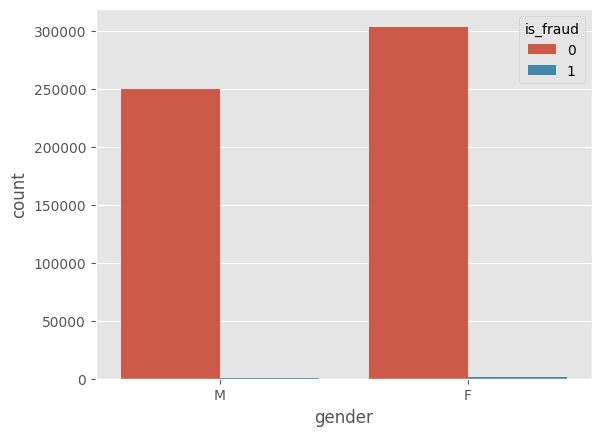

In [124]:
sns.countplot(x= train_df["gender"],hue = "is_fraud",data = train_df)


Day-Wise fraud plot

<Axes: xlabel='day', ylabel='count'>

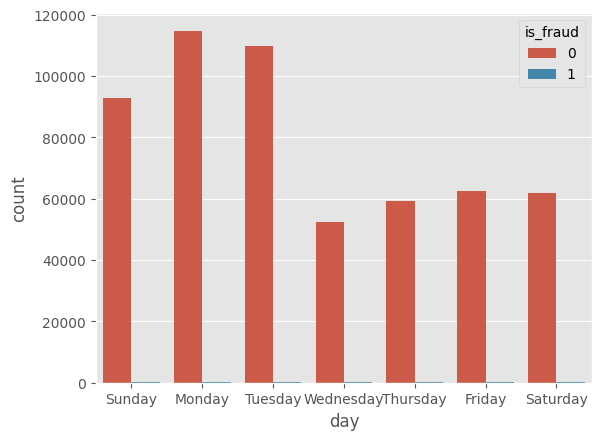

In [125]:
sns.countplot(x= train_df["day"],hue = "is_fraud",data = train_df)


In [126]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   merchant    555719 non-null  object 
 1   category    555719 non-null  object 
 2   amt         555719 non-null  float64
 3   gender      555719 non-null  object 
 4   lat         555719 non-null  float64
 5   long        555719 non-null  float64
 6   city_pop    555719 non-null  int64  
 7   merch_lat   555719 non-null  float64
 8   merch_long  555719 non-null  float64
 9   is_fraud    555719 non-null  int64  
 10  hour        555719 non-null  int32  
 11  day         555719 non-null  object 
 12  month       555719 non-null  int32  
 13  age_cust    555719 non-null  int64  
dtypes: float64(5), int32(2), int64(3), object(4)
memory usage: 55.1+ MB


DATA TYPE CONVERSION USING LABEL ENCODING

In [127]:
from sklearn import preprocessing

label_encoder = preprocessing.LabelEncoder()

train_df['merchant']= label_encoder.fit_transform(train_df['merchant'])
train_df['category']= label_encoder.fit_transform(train_df['category'])
train_df['gender']= label_encoder.fit_transform(train_df['gender'])
train_df['day']= label_encoder.fit_transform(train_df['day'])


In [128]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 555719 entries, 0 to 555718
Data columns (total 14 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   merchant    555719 non-null  int64  
 1   category    555719 non-null  int64  
 2   amt         555719 non-null  float64
 3   gender      555719 non-null  int64  
 4   lat         555719 non-null  float64
 5   long        555719 non-null  float64
 6   city_pop    555719 non-null  int64  
 7   merch_lat   555719 non-null  float64
 8   merch_long  555719 non-null  float64
 9   is_fraud    555719 non-null  int64  
 10  hour        555719 non-null  int32  
 11  day         555719 non-null  int64  
 12  month       555719 non-null  int32  
 13  age_cust    555719 non-null  int64  
dtypes: float64(5), int32(2), int64(7)
memory usage: 55.1 MB


Check For Imbalanced Data

In [129]:
train_df["is_fraud"].value_counts()

is_fraud
0    553574
1      2145
Name: count, dtype: int64

Data is highly unbalanced. We need to balance the data.


Plot the unbalanced Data.

<Axes: xlabel='is_fraud', ylabel='count'>

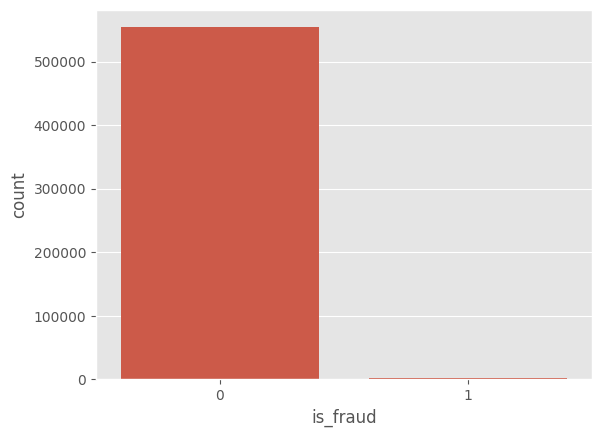

In [130]:
plt.style.use("ggplot")
sns.countplot(x= train_df["is_fraud"])

## RANDOM UNDERSAMPLING

In [131]:
legit = train_df[train_df.is_fraud == 0]
fraud = train_df[train_df.is_fraud == 1]

In [132]:
print(legit.shape)
print(fraud.shape)

(553574, 14)
(2145, 14)


In [133]:
legit_undersample =  legit.sample(n=2145)

In [134]:
randomUndersampled_data = pd.concat([legit_undersample,fraud],axis = 0)

In [135]:
randomUndersampled_data["is_fraud"].value_counts()

is_fraud
0    2145
1    2145
Name: count, dtype: int64

In [136]:
randomUndersammpledData = pd.DataFrame(randomUndersampled_data)
randomUndersammpledData.to_csv('/content/drive/My Drive/CreditCard_DataSet/randomUndersammpledData.csv', index=False)


##RANDOM OVERSAMPLING

In [137]:
n = len(legit)
fraud_over = fraud.sample(n, replace=True)

randomOversampled_data = pd.concat([fraud_over, legit], axis=0)


In [138]:
randomOversampled_data["is_fraud"].value_counts()

is_fraud
1    553574
0    553574
Name: count, dtype: int64

In [139]:
randomOversampledData = pd.DataFrame(randomOversampled_data)
randomOversampledData.to_csv('/content/drive/My Drive/CreditCard_DataSet/randomOversampledData.csv', index=False)

In [140]:
randomOversampled_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1107148 entries, 295700 to 555718
Data columns (total 14 columns):
 #   Column      Non-Null Count    Dtype  
---  ------      --------------    -----  
 0   merchant    1107148 non-null  int64  
 1   category    1107148 non-null  int64  
 2   amt         1107148 non-null  float64
 3   gender      1107148 non-null  int64  
 4   lat         1107148 non-null  float64
 5   long        1107148 non-null  float64
 6   city_pop    1107148 non-null  int64  
 7   merch_lat   1107148 non-null  float64
 8   merch_long  1107148 non-null  float64
 9   is_fraud    1107148 non-null  int64  
 10  hour        1107148 non-null  int32  
 11  day         1107148 non-null  int64  
 12  month       1107148 non-null  int32  
 13  age_cust    1107148 non-null  int64  
dtypes: float64(5), int32(2), int64(7)
memory usage: 118.3 MB
